In [2]:
import pandas as pd
from sklearn.preprocessing import Normalizer, PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression

In [2]:
data_training = pd.read_csv('train_dataset.csv')

In [3]:
data_training

,200,200.020004272461,200.039993286133,200.059997558594,200.080001831055,200.100006103516,200.119995117188,200.139999389648,200.160003662109,200.179992675781,...,999.919982910156,999.940002441406,999.960021972656,999.97998046875,1000,1000.02001953125,Cr,Mn,Mo,Ni
0,0.000010,0.001747,0.001477,0.002694,0.001689,0.001828,0.000127,-0.000101,-0.000023,0.002150,...,0.003621,0.003494,0.003204,0.003204,0.002824,-0.000054,0.045,1.960,0.0403,22.5800
1,0.002484,0.001943,0.001610,0.002062,-0.000746,0.001947,0.002961,0.003321,-0.000938,0.000817,...,0.003975,0.003234,0.001542,0.001542,0.001598,-0.000065,0.045,1.960,0.0403,22.5800
2,0.000230,0.000475,0.000754,0.001994,0.000771,0.001478,0.001255,0.001335,0.001972,0.001638,...,0.002733,0.002162,0.000860,0.000860,0.001336,-0.000043,0.045,1.960,0.0403,22.5800
3,0.001029,0.000596,0.001769,0.000886,0.000491,0.002019,0.000893,-0.001186,0.001689,0.002193,...,0.003059,0.002907,0.002559,0.002559,0.002987,-0.000055,0.045,1.960,0.0403,22.5800
4,-0.003513,0.001748,0.002183,0.000505,-0.000304,0.001544,-0.000112,0.000778,0.001538,0.000532,...,0.003133,0.003745,0.005143,0.005143,0.004133,-0.000057,0.045,1.960,0.0403,22.5800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.002264,0.002402,-0.000559,0.002850,-0.000560,0.000547,-0.000071,0.000628,0.000101,0.001593,...,0.002244,0.002513,0.003128,0.003128,0.003266,-0.000058,4.510,0.303,3.6000,0.0309
2096,0.008210,0.000836,0.000103,0.000765,0.000508,0.005778,0.001087,0.000222,0.008658,0.001648,...,0.003443,0.002637,0.000800,0.000800,0.002035,-0.000156,4.510,0.303,3.6000,0.0309
2097,0.000226,0.006540,0.000969,-0.000720,0.002583,0.004462,0.004571,0.006759,0.003972,-0.000213,...,0.004118,0.003721,0.002817,0.002817,0.002840,-0.000084,4.510,0.303,3.6000,0.0309
2098,0.000237,0.003592,0.000563,0.000284,0.000141,0.000787,0.001087,0.002731,0.000774,-0.000290,...,0.003966,0.003397,0.002099,0.002099,0.002376,-0.000057,4.510,0.303,3.6000,0.0309


In [4]:
X_training = data_training.drop(['Cr','Mn','Mo','Ni'], axis = 1)
y_training_Cr = data_training['Cr']
y_training_Mn = data_training['Mn']
y_training_Mo = data_training['Mo']
y_training_Ni = data_training['Ni']

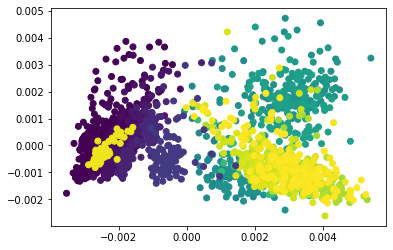

In [5]:
pca = PCA(n_components=3)
projected = pca.fit_transform(Normalizer(norm='l1').fit_transform(X_training))
plt.scatter(projected[:, 0],projected[:, 2],c=data_training['Cr'])

In [6]:
pca.explained_variance_ratio_

array([0.38962641, 0.19457346, 0.08261724])

In [7]:
df = pd.DataFrame()
for i in range(1,len(X_training.columns)-1,3):
    df[(float(X_training.columns[i-1])+float(X_training.columns[i])+float(X_training.columns[i+1]))/3.0] = (X_training[X_training.columns[i-1]]+X_training[X_training.columns[i]]+X_training[X_training.columns[i+1]])/3.0
X_training_avg = df.copy()

C:\Users\marci\AppData\Local\Temp/ipykernel_25644/1434724369.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(float(X_training.columns[i-1])+float(X_training.columns[i])+float(X_training.columns[i+1]))/3.0] = (X_training[X_training.columns[i-1]]+X_training[X_training.columns[i]]+X_training[X_training.columns[i+1]])/3.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_training_avg, y_training_Cr, test_size=0.33, random_state=42)

In [9]:
corr_arr = []
for wavelength in X_train.var().nlargest(8000).index:
    corr_arr.append(np.corrcoef(y_train, X_train[wavelength])[0,1])

In [10]:
data_corr = pd.DataFrame({'wavlength':X_train.var().nlargest(8000).index,'corr':corr_arr})

In [11]:
selected_wavlength_Cr = data_corr.nlargest(529,'corr').wavlength.reset_index(drop=True)

In [12]:
selected_wavlength_Cr 

0      285.940002
1      286.720001
2      286.299998
3      313.240000
4      285.039998
          ...    
524    305.559998
525    305.680003
526    579.219991
527    331.359996
528    305.260000
Name: wavlength, Length: 529, dtype: float64

In [123]:
data_Cr = X_training_avg[selected_wavlength_Cr]

In [15]:
data_Cr

,285.940002,286.720001,286.299998,313.240000,285.039998,282.279999,287.680003,286.599996,286.539998,267.760000,...,746.260010,271.240000,533.019999,578.860006,299.140004,305.559998,305.680003,579.219991,331.359996,305.260000
0,0.010645,0.009447,0.009219,0.020078,0.011329,0.006282,0.010734,0.008109,0.014131,0.013714,...,0.021324,0.024887,0.017657,0.012729,0.008145,0.011310,0.009662,0.012307,0.006128,0.006892
1,0.004783,0.006092,0.005664,0.008964,0.005239,0.005125,0.006994,0.006154,0.008963,0.007917,...,0.022315,0.015843,0.016967,0.013704,0.004939,0.006843,0.006226,0.014822,0.006410,0.005210
2,0.011908,0.011751,0.009604,0.012910,0.010366,0.008834,0.013017,0.009672,0.013353,0.013547,...,0.015960,0.031042,0.015088,0.011719,0.008864,0.010883,0.012309,0.009662,0.007097,0.008629
3,0.006349,0.005904,0.006221,0.009836,0.007446,0.004374,0.009314,0.007538,0.009131,0.008965,...,0.022959,0.020099,0.017949,0.011741,0.004859,0.006042,0.006576,0.013888,0.005093,0.005325
4,0.010677,0.007238,0.008908,0.011574,0.008981,0.004034,0.011522,0.008999,0.013990,0.011921,...,0.022818,0.026950,0.020351,0.017296,0.007387,0.012786,0.013326,0.013083,0.007392,0.007280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.034979,0.061488,0.055497,0.163159,0.056722,0.031023,0.027192,0.020267,0.076582,0.074278,...,0.026459,0.022444,0.018685,0.014017,0.007619,0.012126,0.011810,0.015203,0.007084,0.011362
2096,0.041868,0.060727,0.060972,0.160945,0.059839,0.029361,0.022622,0.021960,0.080633,0.077224,...,0.026491,0.027432,0.018632,0.019823,0.007738,0.015825,0.016938,0.010288,0.008497,0.017750
2097,0.060871,0.109129,0.095944,0.266845,0.099705,0.052162,0.047540,0.037420,0.142165,0.130479,...,0.028727,0.035718,0.022208,0.017589,0.010899,0.017299,0.027495,0.020887,0.009724,0.014620
2098,0.046610,0.072786,0.067023,0.197644,0.070607,0.041043,0.033778,0.026023,0.100109,0.101538,...,0.024216,0.032517,0.018240,0.015608,0.010752,0.013397,0.015370,0.015554,0.005524,0.013847


In [56]:
pca = PCA(n_components=8)
projected = pca.fit_transform(Normalizer(norm='l1').fit_transform(data_Cr))
projected = pca.fit_transform(data_Cr)

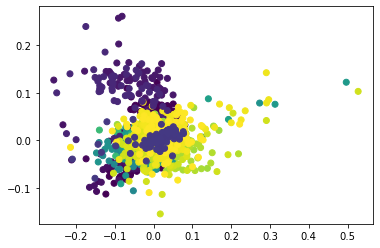

In [66]:
plt.scatter(projected[:, 6],projected[:, 7],c=data_training['Cr'])


In [54]:
pca.explained_variance_ratio_

array([0.89031628, 0.06079923, 0.01373021, 0.00799241, 0.0045567 ,
       0.0033141 , 0.00253062, 0.00158458])

In [55]:
len(set(data_training['Cr']))

41

In [110]:
def simple_regression(X,y):
 
    pls = PLSRegression(n_components=8)
 
    # Fit
    pls.fit(X, y)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)
 
    # Calculate scores
    score = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
 
    return y_cv, score, mse

In [113]:
 y_cv, score,mse = simple_regression(data_Cr ,data_training['Cr'])

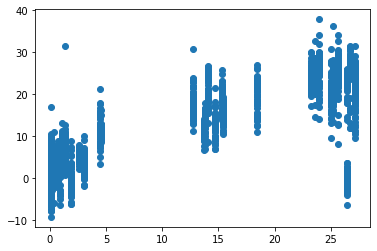

In [114]:
plt.scatter(data_training['Cr'],y_cv)

In [107]:
score

0.47932203096576875

In [108]:
mse

59.03807502207126

In [126]:
data_Cr['Cr'] = data_training['Cr']

In [117]:
data_Cr['Cr']

0       0.045
1       0.045
2       0.045
3       0.045
4       0.045
        ...  
2095    4.510
2096    4.510
2097    4.510
2098    4.510
2099    4.510
Name: Cr, Length: 2100, dtype: float64

In [127]:
data_Cr.to_csv('data_Cr.csv')

In [124]:
data_Cr = data_Cr.reindex(sorted(data_Cr.columns), axis=1)

Index([285.94000244140597,   286.720001220703,   286.299997965495,
         313.240000406901,   285.039998372396,   282.279998779297,
       287.68000284830697,    286.59999593099,   286.539998372396,
         267.759999593099,
       ...
         271.240000406901,   533.019999186198,  578.8600056966144,
       299.14000447591167,   305.559997558594, 305.68000284830697,
         579.219991048177, 331.35999552408833,   305.259999593099,
                     'Cr'],
      dtype='object', length=530)

In [128]:
data_training['Cr']

0       0.045
1       0.045
2       0.045
3       0.045
4       0.045
        ...  
2095    4.510
2096    4.510
2097    4.510
2098    4.510
2099    4.510
Name: Cr, Length: 2100, dtype: float64

In [4]:
pd.read_csv('test_dataset.csv')

,200,200.020004272461,200.039993286133,200.059997558594,200.080001831055,200.100006103516,200.119995117188,200.139999389648,200.160003662109,200.179992675781,...,999.859985351562,999.880004882812,999.900024414062,999.919982910156,999.940002441406,999.960021972656,999.97998046875,1000,1000.02001953125,target_name
0,-0.000282,0.002280,0.001390,0.002693,0.002413,0.000869,0.001447,0.000459,-0.000736,0.000608,...,0.001770,0.002016,0.003093,0.003093,0.002685,0.001755,0.001755,0.002065,-0.000047,target_1
1,-0.001445,0.004209,0.001094,0.006354,0.002393,0.002244,-0.001137,0.000311,0.004419,0.003872,...,0.003188,0.003119,0.002818,0.002818,0.003392,0.004702,0.004702,0.003384,-0.000066,target_1
2,-0.000379,0.000213,-0.000253,0.000799,0.002577,0.001133,0.001676,-0.000288,0.000957,0.001679,...,0.002766,0.002631,0.002041,0.002041,0.002031,0.002007,0.002007,0.002543,-0.000054,target_1
3,-0.001947,0.002149,0.000494,0.001369,0.001287,0.000461,0.002566,0.001853,0.000813,0.002437,...,0.004435,0.004328,0.003858,0.003858,0.003710,0.003372,0.003372,0.002899,-0.000060,target_1
4,0.001290,0.003015,-0.001153,0.002439,0.003256,0.001455,-0.000354,0.004217,0.000976,0.001532,...,0.002537,0.002775,0.003816,0.003816,0.003554,0.002956,0.002956,0.003322,-0.000057,target_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.010022,-0.018580,0.000785,0.002530,0.008036,-0.007088,0.009279,0.001981,0.002254,0.012267,...,0.001385,0.001771,0.003463,0.003463,0.002045,-0.001188,-0.001188,0.001729,-0.000437,target_15
746,-0.002861,0.015455,0.008695,0.006185,0.001348,0.012455,0.005612,0.008086,0.015472,0.007966,...,0.000622,0.000430,-0.000409,-0.000409,0.000056,0.001115,0.001115,0.001477,-0.000366,target_15
747,0.001782,0.003073,-0.001000,0.003611,0.011020,-0.003466,0.000759,0.005815,0.003562,-0.001895,...,0.001533,0.001800,0.002967,0.002967,0.003223,0.003806,0.003806,0.002880,-0.000293,target_15
748,-0.004231,-0.003187,0.004756,0.008233,-0.000188,0.011335,0.013343,0.014070,-0.001752,0.001960,...,0.001961,0.001693,0.000520,0.000520,0.001009,0.002126,0.002126,0.001977,-0.000319,target_15
